In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt

from sklearn.naive_bayes import BernoulliNB
import seaborn as sns
imdb = pd.read_csv('C:/Users/ezzan/Downloads/python_drills/imdb_labelled.txt', delimiter= '\t', header=None)
imdb.columns = ['review', 'rating']

### search titles based on negative titles and equal case

In [ ]:
ngkeywords = ['stink', 'boring', 'hated', 'hate', 'disappointing', 'worst', 'bad','badly', 'waste of time','wasted', 'sucked', 'terrible', 'horrible', 'poorly']
imdb['review'] = imdb['review'].str.lower()

In [ ]:

for ng in ngkeywords:
    imdb[str(ng)] = imdb.review.str.contains(
        ' ' + str(ng),
        case=False)


for ng in ngkeywords:
    testdata = imdb[imdb[ng] == True]
    print(ng)
    print(len(testdata))

In [ ]:
data = imdb[ngkeywords]
target = imdb['rating']


# First Iteration
The most obvious starting point for first iteration is by detecting how mislabels there in our data set and subsequently the confusion matrix how many labels were distributed correctly and incorrectly.

In [ ]:
sns.heatmap(imdb.corr())

In [ ]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

### Confusion Matrix for First Iteration

In [ ]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(target, y_pred)
print(matrix)

## Sensitivity and Specificity metrics for First Iteration

we will now continue to include the sensitivity and specificity metrtics.
Specificity includes the percentage of negatives incorrectly identified, while sensitivity will include the percentage of negatives correctly identified. We are looking for a high sensitivity rate.

In [ ]:
print("Correctly classified as negative:", matrix[0][0])
print("Correctly classified as positive:", matrix[1][1])
print("Incorrectly classified as negative:", matrix[1][0])
print("Incorrectly classified as positive:", matrix[0][1])
print("Proportion correctly classified:" ,(matrix[0][0]+ matrix[1][1])/(len(imdb)))

In [ ]:
specificity = matrix[0][0]/(matrix[0][0]+matrix[0][1])
print(specificity)
sensitivity = matrix[1][1]/(matrix[1][1]+matrix[1][0])
print(sensitivity)

####  Sensitivity dictates 98% of positives are correcty identified as positive. Specificity dictates only 23% we thought were neg. are actually negative

# Second Iteration

### Holdout Model

One way to combat overfitting is by selectively reserving only some of our data for testing instead of including the entire set; this set is called a "holdout group." While there is a cost to having less training data, your evaluation will be far more reliable.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

 To detect for overfitting, the two values above must be consistent with one another. As seen above both values are extremly low thus implying correlation to each other and suggesting there is not so much overfitting.

# Third Iteration

Building off the holdout iteration performed earlier we will perform a cross validation. This consists of a more robust version of holdout groups. Instead of creating just one holdout, we will create several. By breaking up data into folds we can explore the data and the target groups a certain amount of times, each time with a different fold held out from the data and used as the test set. If the scores are in close proximity to one another that is a good sign our data is not overfitting.


In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=2)

### Confusion Index for Third Iteration ??

In [ ]:

matrix = confusion_matrix(target, y_pred)
print(matrix)

# Fourth Iteration
broaden and manipulate features by including postitve keywords as well in addition to changing the case of all the reviews to be compatible to the keywords.

In [ ]:

poskeywords = ['amazing', 'brilliant', 'good', 'nice', 'happy', 'must see', 'well']   
for ng in poskeywords:
    imdb[str(ng)] = imdb.review.str.contains(
        ' ' + str(ng),
        case=False)

In [ ]:
ngkeywords = ['stink', 'hated', 'hate', 'disappointing', 'worst', 'bad','badly', 'waste of time','wasted', 'sucked', 'terrible', 'horrible', 'poorly']
poskeywords = ['amazing', 'brilliant', 'good', 'nice', 'happy', 'must see', 'well']   

In [ ]:
for ng in poskeywords:
    imdb[str(ng)] = imdb.review.str.contains(
        ' ' + str(ng),
        case=False)

In [ ]:
for ng in poskeywords:
    testdata = imdb[imdb[ng] == True]
    print(ng)
    print(len(testdata))

In [ ]:
for ng in ngkeywords:
    testdata = imdb[imdb[ng] == True]
    print(ng)
    print(len(testdata))

In [ ]:
data1 = imdb[poskeywords + ngkeywords]
target = imdb['rating']

In [ ]:
sns.heatmap(imdb.corr())

In [95]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data1, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data1)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data1.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 748 points : 293


In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data1, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data1, target).score(data1, target)))

With 20% Holdout: 0.5866666666666667
Testing on Sample: 0.6082887700534759


this holdout seems to be more accurate than the one in first iteration

In [97]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

array([[ 75, 287],
       [  6, 380]], dtype=int64)

In [98]:
print("Correctly classified as negative:", matrix[0][0])
print("Correctly classified as positive:", matrix[1][1])
print("Incorrectly classified as negative:", matrix[1][0])
print("Incorrectly classified as positive:", matrix[0][1])
print("Proportion correctly classified:" ,(matrix[0][0]+ matrix[1][1])/(len(imdb)))

Correctly classified as negative: 81
Correctly classified as positive: 379
Incorrectly classified as negative: 7
Incorrectly classified as positive: 281
Proportion correctly classified: 0.6149732620320856


In [99]:
specificity = matrix[0][0]/(matrix[0][0]+matrix[0][1])
print(specificity)
sensitivity = matrix[1][1]/(matrix[1][1]+matrix[1][0])
print(sensitivity)

0.22375690607734808
0.9818652849740933


Sensitivity dictates 98% of positives are correcty identified as positive. Specificity dictates only 22% we thought were neg. are actually negative. This test does not vary dramtically from our first confusion matrix.

In [45]:
yelp = pd.read_csv('C:/Users/ezzan/Downloads/python_drills/yelp_labelled.txt', delimiter= '\t', header=None)
yelp.columns = ['review', 'rating']
yelp.head(100)

,review,rating
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0
8,The fries were great too.,1
9,A great touch.,1


In [46]:
ngkeywords1 = ['stink', 'boring', 'hated', 'disappointing', 'worst', 'bad', 'waste of time','wasted','stunk', 'sucked', 'terrible', 'horrible', 'poorly']
poskeywords = ['amazing', 'brilliant', 'good', 'nice', 'captivating', 'happy', 'must see', 'well']   

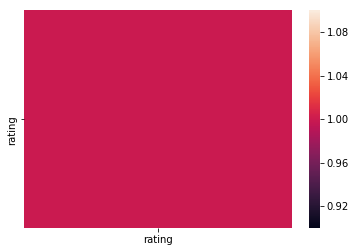

In [47]:
sns.heatmap(yelp.corr())

In [48]:
for ng in ngkeywords1:
    yelp[str(ng)] = yelp.review.str.contains(
        ' ' + str(ng),
        case=False)

In [49]:
data2 = yelp[ngkeywords]
target1 = yelp['review']

KeyError: "['Boring' 'hate' 'badly'] not in index"

In [ ]:
bnb = BernoulliNB()
bnb.fit(data2, target1)
predict = bnb.predict(data2)

print("Number of mislabeled points out of a total {} points : {}".format(
    data2.shape[0],
    (target1 != predict).sum()
))


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)